# Daily weather data in the Netherlands

- https://www.knmi.nl/nederland-nu/klimatologie/daggegevens
- https://aqicn.org/city/amsterdam/
- https://www.luchtmeetnet.nl/informatie/luchtkwaliteit/luchtkwaliteitsindex-(lki)

## Installing packages

In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mode
import collections
from datetime import datetime

## Importing data

### Weather

YYYYMMDD = Date (YYYY=year MM=month DD=day) / Date (YYYY=year MM=month DD=day

DDVEC = Vector mean wind direction in degrees (360=north, 90=east, 180=south, 270=west, 0=cale/variable). See http://www.knmi.nl/kennis-en-datacentrum/grond/klimatologische-brochures-en-boeken / Vector mean wind direction in degrees (360=north, 90=east, 180=south, 270=west, 0=calm/variable)

FHVEC = Vector mean wind speed (in 0.1 m/s). See http://www.knmi.nl/kennis-en-datacentrum/grond/klimatologische-brochures-en-boeken / Vector mean windspeed (in 0.1 m/s)

FG = 24-hour mean wind speed (in 0.1 m/s) / Daily mean wind speed (in 0.1 m/s)

FHX = Highest hourly mean wind speed (in 0.1 m/s) / Maximum hourly mean wind speed (in 0.1 m/s)

FHXH = Hour segment in which FHX was measured / Hourly division in which FHX was measured

FHN = Lowest hourly mean wind speed (in 0.1 m/s) / Minimum hourly mean wind speed (in 0.1 m/s)

FHNH = Hour segment in which FHN was measured / Hourly division in which FHN was measured

FXX = Highest wind gust (in 0.1 m/s) / Maximum wind gust (in 0.1 m/s)

FXXH = Hour segment in which FXX was measured / Hourly division in which FXX was measured

TG = 24-hour average temperature (in 0.1 degrees Celsius) / Daily mean temperature in (0.1 degrees Celsius)

TN = Minimum temperature (in 0.1 degrees Celsius) / Minimum temperature (in 0.1 degrees Celsius)

TNH = Hourly division in which TN was measured / Hourly division in which TN was measured

TX = Maximum temperature (in 0.1 degrees Celsius) / Maximum temperature (in 0.1 degrees Celsius)

TXH = Hour segment in which TX was measured / Hourly division in which TX was measured

T10N = Minimum temperature at 10 cm height (in 0.1 degrees Celsius) / Minimum temperature at 10 cm above surface (in 0.1 degrees Celsius)

T10NH = 6-hour period in which T10N was measured / 6-hourly division in which T10N was measured; 6=0-6 UT, 12=6-12 UT, 18=12-18 UT, 24=18-24 UT

SQ = Sunshine duration (in 0.1 hour) calculated from global radiation (-1 for <0.05 hour) / Sunshine duration (in 0.1 hour) calculated from global radiation (-1 for <0.05 hour)

SP = Percentage of longest possible sunshine duration / Percentage of maximum potential sunshine duration

Q = Global radiation (in J/cm2) / Global radiation (in J/cm2)

DR = Duration of precipitation (in 0.1 hour) / Precipitation duration (in 0.1 hour)

RH = Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm) / Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm)

RHX = Maximum hourly precipitation amount (in 0.1 mm) (-1 for <0.05 mm) / Maximum hourly precipitation amount (in 0.1 mm) (-1 for <0.05 mm)

RHXH = Hour segment in which RHX was measured / Hourly division in which RHX was measured

PG = 24-hour mean air pressure converted to sea level (in 0.1 hPa) calculated from 24 hourly values ​​/ Daily mean sea level pressure (in 0.1 hPa) calculated from 24 hourly values

PX = Highest hourly value of the air pressure converted to sea level (in 0.1 hPa) / Maximum hourly sea level pressure (in 0.1 hPa)

PXH = Hourly division in which PX was measured

PN = Lowest hourly value of air pressure converted to sea level (in 0.1 hPa) / Minimum hourly sea level pressure (in 0.1 hPa)

PNH = Hourly division in which PN was measured

VVN = Minimum Visibility Occurred / Minimum Visibility; 0: <100m, 1:100-200m, 2:200-300m,..., 49:4900-5000m, 50:5-6km, 56:6-7km, 57:7-8 km,..., 79:29-30 km, 80:30-35 km, 81:35-40 km,..., 89: >70 km)

VVNH = Hour segment in which VVN was measured / Hourly division in which VVN was measured

VVX = Maximum Visibility Occurred / Maximum Visibility; 0: <100m, 1:100-200m, 2:200-300m,..., 49:4900-5000m, 50:5-6km, 56:6-7km, 57:7-8 km,..., 79:29-30 km, 80:30-35 km, 81:35-40 km,..., 89: >70 km)

VVXH = Hour segment in which VVX was measured / Hourly division in which VVX was measured

NG = 24-hour average cloud cover (coverage of the upper air in eighths, 9=superior invisible) / Mean daily cloud cover (in octants, 9=sky invisible)

UG = 24-hour average relative humidity (in percents) / Daily mean relative atmospheric humidity (in percents)

UX = Maximum relative atmospheric humidity (in percents) / Maximum relative atmospheric humidity (in percents)

UXH = Hourly division in which UX was measured

UN = Minimum relative atmospheric humidity (in percents) / Minimum relative atmospheric humidity (in percents)

UNH = Hour segment in which UN was measured / Hourly division in which UN was measured

EV24 = Reference crop evaporation (Makkink) (in 0.1 mm) / Potential evapotranspiration (Makkink) (in 0.1 mm)

In [79]:
weather = pd.read_csv(r'C:\Users\claud\data_final_project\Usefull\etmgeg_240_Ams_Schiphol\etmgeg_240.txt'#)
                      , low_memory = False)
                      #, dtype='int') # doesn't work bc of the spaces we have within the cells
                      #{'  FXX': int}
weather = weather[(weather.YYYYMMDD >= 20131231)]
weather.head()

,# STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
23010,240,20131231,167,72,73,90,10,50,5,130,...,24,83,18,8,83,95,24,63,18,2
23011,240,20140101,168,78,80,110,21,60,2,170,...,1,75,15,7,89,95,2,78,15,2
23012,240,20140102,191,62,70,100,1,50,16,140,...,10,70,2,5,88,93,10,81,13,3
23013,240,20140103,199,91,97,130,23,70,1,230,...,6,75,24,6,86,95,7,78,20,2
23014,240,20140104,169,64,69,110,1,40,23,150,...,6,74,14,7,86,93,22,79,14,2


- Excluding the first column as it contains only the data station reference

In [80]:
weather.columns

Index(['# STN', 'YYYYMMDD', 'DDVEC', 'FHVEC', '   FG', '  FHX', ' FHXH',
       '  FHN', ' FHNH', '  FXX', ' FXXH', '   TG', '   TN', '  TNH', '   TX',
       '  TXH', ' T10N', 'T10NH', '   SQ', '   SP', '    Q', '   DR', '   RH',
       '  RHX', ' RHXH', '   PG', '   PX', '  PXH', '   PN', '  PNH', '  VVN',
       ' VVNH', '  VVX', ' VVXH', '   NG', '   UG', '   UX', '  UXH', '   UN',
       '  UNH', ' EV24'],
      dtype='object')

In [81]:
weather = weather[['YYYYMMDD', 'DDVEC', 'FHVEC', '   FG', '  FHX', ' FHXH',
       '  FHN', ' FHNH', '  FXX', ' FXXH', '   TG', '   TN', '  TNH', '   TX',
       '  TXH', ' T10N', 'T10NH', '   SQ', '   SP', '    Q', '   DR', '   RH',
       '  RHX', ' RHXH', '   PG', '   PX', '  PXH', '   PN', '  PNH', '  VVN',
       ' VVNH', '  VVX', ' VVXH', '   NG', '   UG', '   UX', '  UXH', '   UN',
       '  UNH', ' EV24']]

### Air quality

In [82]:
air_quality = pd.read_csv(r'C:\Users\claud\data_final_project\Usefull\amsterdam-air-quality.csv')

In [83]:
air_quality.head()

,date,pm25,pm10,o3,no2,so2,co
0,2021/9/1,44,25,30,22,,3
1,2021/9/2,49,27,32,22,,3
2,2021/9/3,57,23,31,14,,3
3,2021/9/4,46,22,34,15,,3
4,2021/9/5,50,27,37,26,,4


In [84]:
newdate = []

for i in air_quality['date']:
    a = i.split('/')
    year = "{:04d}".format(int(a[0]))
    month = "{:02d}".format(int(a[1]))
    day = "{:02d}".format(int(a[2]))
    b = year + month + day
    newdate.append(b)
    
air_quality['newdate'] = newdate

In [85]:
air_quality.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co', 'newdate'], dtype='object')

In [86]:
air_quality = air_quality.sort_values(by=['newdate'], ascending=True)
air_quality = air_quality[['newdate', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']]
air_quality.head()

,newdate,pm25,pm10,o3,no2,so2,co
2664,20131231,,,,30,,
2579,20140101,,42,,32,,
2580,20140102,,14,,28,,
2581,20140103,,17,,26,,
2582,20140104,,19,,28,,


## Data Cleaning

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.

- Standardizing headers by removing spaces and capital letters

In [87]:
def standardheader(df):
    df.columns = [x.strip(' ').lower() for x in df.columns]

In [88]:
standardheader(weather)
standardheader(air_quality)

In [89]:
weather.columns

Index(['yyyymmdd', 'ddvec', 'fhvec', 'fg', 'fhx', 'fhxh', 'fhn', 'fhnh', 'fxx',
       'fxxh', 'tg', 'tn', 'tnh', 'tx', 'txh', 't10n', 't10nh', 'sq', 'sp',
       'q', 'dr', 'rh', 'rhx', 'rhxh', 'pg', 'px', 'pxh', 'pn', 'pnh', 'vvn',
       'vvnh', 'vvx', 'vvxh', 'ng', 'ug', 'ux', 'uxh', 'un', 'unh', 'ev24'],
      dtype='object')

In [90]:
air_quality.columns

Index(['newdate', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

- Checking NaN values

In [91]:
weather.isnull().sum()
#weather.isna().sum() # both give the same result

yyyymmdd    0
ddvec       0
fhvec       0
fg          0
fhx         0
fhxh        0
fhn         0
fhnh        0
fxx         0
fxxh        0
tg          0
tn          0
tnh         0
tx          0
txh         0
t10n        0
t10nh       0
sq          0
sp          0
q           0
dr          0
rh          0
rhx         0
rhxh        0
pg          0
px          0
pxh         0
pn          0
pnh         0
vvn         0
vvnh        0
vvx         0
vvxh        0
ng          0
ug          0
ux          0
uxh         0
un          0
unh         0
ev24        0
dtype: int64

In [92]:
air_quality.isnull().sum()
#air_quality.isna().sum() # both give the same result

newdate    0
pm25       0
pm10       0
o3         0
no2        0
so2        0
co         0
dtype: int64

In [93]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 23010 to 25888
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   yyyymmdd  2879 non-null   int64 
 1   ddvec     2879 non-null   int64 
 2   fhvec     2879 non-null   int64 
 3   fg        2879 non-null   int64 
 4   fhx       2879 non-null   int64 
 5   fhxh      2879 non-null   int64 
 6   fhn       2879 non-null   int64 
 7   fhnh      2879 non-null   int64 
 8   fxx       2879 non-null   object
 9   fxxh      2879 non-null   object
 10  tg        2879 non-null   int64 
 11  tn        2879 non-null   int64 
 12  tnh       2879 non-null   object
 13  tx        2879 non-null   int64 
 14  txh       2879 non-null   object
 15  t10n      2879 non-null   object
 16  t10nh     2879 non-null   object
 17  sq        2879 non-null   object
 18  sp        2879 non-null   object
 19  q         2879 non-null   object
 20  dr        2879 non-null   object
 21  rh       

- Checking how a column type 'object' looks like

In [94]:
weather['fxx'].unique()

array(['  130', '  170', '  140', '  230', '  150', '  180', '  240',
       '  120', '   90', '   80', '  100', '  110', '   60', '  200',
       '  160', '  220', '  210', '   70', '   50', '  250', '  190',
       '  270', '   40', '  320', '  280', '  260', '   30', '  340',
       '  310', '  300'], dtype=object)

In [95]:
weather['fxx'][:10]

23010      130
23011      170
23012      140
23013      230
23014      150
23015      140
23016      180
23017      180
23018      130
23019      240
Name: fxx, dtype: object

In [96]:
weather['t10n'].unique()

array(['   44', '   34', '   50', '   51', '   48', '    6', '   61',
       '   79', '   55', '   63', '   35', '    8', '  -32', '   25',
       '   19', '   14', '   36', '   39', '    1', '    5', '    2',
       '   20', '   31', '   12', '  -27', '  -30', '  -52', '   33',
       '   15', '   -1', '   18', '   32', '   52', '   29', '   -2',
       '   53', '  -11', '  -15', '   37', '   38', '   16', '   42',
       '   17', '   -7', '  -19', '  -16', '  -34', '    9', '  -10',
       '  -26', '  -25', '   76', '   78', '   64', '   58', '    7',
       '   28', '   82', '   26', '   72', '  103', '   60', '   71',
       '   97', '   45', '   41', '   74', '   30', '   -4', '  -29',
       '   96', '   80', '   47', '   40', '  114', '  108', '  100',
       '   95', '   99', '  107', '   90', '   23', '    3', '   75',
       '  142', '  120', '   94', '   86', '  118', '  145', '   43',
       '   22', '   68', '  123', '  153', '   69', '  116', '  127',
       '   87', '   

In [97]:
weather['t10n'][:10]

23010       44
23011       34
23012       50
23013       51
23014       48
23015        6
23016       61
23017       79
23018       55
23019       63
Name: t10n, dtype: object

- We have a problem with spaces (' ')

In [98]:
for x in weather.columns:
    a = weather[x].dtypes == 'object'
    if a == True:
        weather[x] = [x.strip(' ') for x in weather[x]]
    else:
        pass

In [99]:
weather['t10n'].unique()

array(['44', '34', '50', '51', '48', '6', '61', '79', '55', '63', '35',
       '8', '-32', '25', '19', '14', '36', '39', '1', '5', '2', '20',
       '31', '12', '-27', '-30', '-52', '33', '15', '-1', '18', '32',
       '52', '29', '-2', '53', '-11', '-15', '37', '38', '16', '42', '17',
       '-7', '-19', '-16', '-34', '9', '-10', '-26', '-25', '76', '78',
       '64', '58', '7', '28', '82', '26', '72', '103', '60', '71', '97',
       '45', '41', '74', '30', '-4', '-29', '96', '80', '47', '40', '114',
       '108', '100', '95', '99', '107', '90', '23', '3', '75', '142',
       '120', '94', '86', '118', '145', '43', '22', '68', '123', '153',
       '69', '116', '127', '87', '83', '117', '59', '62', '73', '56',
       '91', '128', '147', '131', '146', '130', '124', '119', '113',
       '121', '170', '168', '175', '191', '140', '159', '155', '148',
       '105', '126', '138', '101', '149', '135', '111', '98', '122', '92',
       '88', '57', '67', '84', '46', '115', '132', '102', '66', '77

- As now all the information in the data frame looks like numeric let's convert all columns to numeric

In [101]:
for x in weather.columns:
    a = weather[x].dtypes == 'object'
    if a == True:
        weather[x] = pd.to_numeric(weather[x], errors='coerce')
    else:
        pass

In [102]:
weather.dtypes

yyyymmdd      int64
ddvec         int64
fhvec         int64
fg            int64
fhx           int64
fhxh          int64
fhn           int64
fhnh          int64
fxx           int64
fxxh          int64
tg            int64
tn            int64
tnh           int64
tx            int64
txh           int64
t10n        float64
t10nh       float64
sq            int64
sp            int64
q             int64
dr            int64
rh            int64
rhx           int64
rhxh          int64
pg            int64
px            int64
pxh           int64
pn            int64
pnh           int64
vvn         float64
vvnh        float64
vvx         float64
vvxh        float64
ng          float64
ug            int64
ux            int64
uxh           int64
un            int64
unh           int64
ev24          int64
dtype: object

In [118]:
weather.isna().sum()

yyyymmdd    0
ddvec       0
fhvec       0
fg          0
fhx         0
fhxh        0
fhn         0
fhnh        0
fxx         0
fxxh        0
tg          0
tn          0
tnh         0
tx          0
txh         0
t10n        8
t10nh       8
sq          0
sp          0
q           0
dr          0
rh          0
rhx         0
rhxh        0
pg          0
px          0
pxh         0
pn          0
pnh         0
vvn         1
vvnh        1
vvx         1
vvxh        1
ng          5
ug          0
ux          0
uxh         0
un          0
unh         0
ev24        0
dtype: int64

- Treating NaN values

In [120]:
nans = ['t10n', 't10nh', 'vvn', 'vvnh', 'vvx', 'vvxh', 'ng']

In [123]:
for x in nans:
    print(weather[x].describe().T, '\n')

count    2871.000000
mean       54.573668
std        55.138357
min      -125.000000
25%        15.000000
50%        54.000000
75%        96.000000
max       191.000000
Name: t10n, dtype: float64 

count    2871.000000
mean       13.481714
std         8.511783
min         6.000000
25%         6.000000
50%         6.000000
75%        24.000000
max        24.000000
Name: t10nh, dtype: float64 

count    2878.000000
mean       47.077137
std        20.379173
min         0.000000
25%        33.000000
50%        56.000000
75%        62.000000
max        80.000000
Name: vvn, dtype: float64 

count    2878.000000
mean        9.675122
std         8.286393
min         1.000000
25%         3.000000
50%         6.000000
75%        18.000000
max        24.000000
Name: vvnh, dtype: float64 

count    2878.000000
mean       76.228631
std         7.171022
min         9.000000
25%        74.000000
50%        80.000000
75%        82.000000
max        83.000000
Name: vvx, dtype: float64 

count    2878.00

In [124]:
for x in nans:
    a = weather[x].mode()
    weather[x] = weather[x].fillna(a)

In [129]:
a = [x for x in weather.isna().sum().tolist() if x != 0]
a

[8, 8, 1, 1, 1, 1, 5]

- As the code didn't work, doing it separated

In [130]:
weather['t10n'] = weather['t10n'].fillna(weather['t10n'].mode())
weather['t10nh'] = weather['t10nh'].fillna(weather['t10nh'].mode())
weather['vvn'] = weather['vvn'].fillna(weather['vvn'].mode())
weather['vvnh'] = weather['vvnh'].fillna(weather['vvnh'].mode())
weather['vvx'] = weather['vvx'].fillna(weather['vvx'].mode())
weather['vvxh'] = weather['vvxh'].fillna(weather['vvxh'].mode())
weather['ng'] = weather['ng'].fillna(weather['ng'].mode())

In [131]:
weather['t10n'][weather['t10n'].isna()==True]

25605   NaN
25606   NaN
25607   NaN
25608   NaN
25610   NaN
25611   NaN
25612   NaN
25613   NaN
Name: t10n, dtype: float64

- Why is not working?

- The code bellow replace in all rows...

In [765]:
#a = weather['t10n'].mode()
#weather['t10n'] = weather['t10n'].fillna(a, inplace=True) # without the inplace = True the code not even work

In [132]:
#weather['t10n'].describe().T

In [133]:
#weather['t10n'].isna().sum()

 - Replacing Nan in all data frame, but checking the attention columns

In [134]:
nan = weather[['t10n', 't10nh', 'vvn', 'vvnh', 'vvx', 'vvxh', 'ng']]
nan.describe().T

,count,mean,std,min,25%,50%,75%,max
t10n,2871.0,54.573668,55.138357,-125.0,15.0,54.0,96.0,191.0
t10nh,2871.0,13.481714,8.511783,6.0,6.0,6.0,24.0,24.0
vvn,2878.0,47.077137,20.379173,0.0,33.0,56.0,62.0,80.0
vvnh,2878.0,9.675122,8.286393,1.0,3.0,6.0,18.0,24.0
vvx,2878.0,76.228631,7.171022,9.0,74.0,80.0,82.0,83.0
vvxh,2878.0,12.501390,5.482855,1.0,10.0,13.0,16.0,24.0
ng,2874.0,5.799235,2.211192,0.0,5.0,6.0,8.0,8.0


In [135]:
weather = weather.replace(np.nan, 0)

In [136]:
nan = weather[['t10n', 't10nh', 'vvn', 'vvnh', 'vvx', 'vvxh', 'ng']]
nan.describe().T

,count,mean,std,min,25%,50%,75%,max
t10n,2879.0,54.422022,55.136586,-125.0,14.0,54.0,96.0,191.0
t10nh,2879.0,13.444251,8.529530,0.0,6.0,6.0,24.0,24.0
vvn,2879.0,47.060785,20.394514,0.0,33.0,56.0,62.0,80.0
vvnh,2879.0,9.671761,8.286916,0.0,3.0,6.0,18.0,24.0
vvx,2879.0,76.202154,7.309174,0.0,74.0,80.0,82.0,83.0
vvxh,2879.0,12.497048,5.486851,0.0,10.0,13.0,16.0,24.0
ng,2879.0,5.789163,2.222431,0.0,5.0,6.0,8.0,8.0


In [137]:
weather.isna().sum()

yyyymmdd    0
ddvec       0
fhvec       0
fg          0
fhx         0
fhxh        0
fhn         0
fhnh        0
fxx         0
fxxh        0
tg          0
tn          0
tnh         0
tx          0
txh         0
t10n        0
t10nh       0
sq          0
sp          0
q           0
dr          0
rh          0
rhx         0
rhxh        0
pg          0
px          0
pxh         0
pn          0
pnh         0
vvn         0
vvnh        0
vvx         0
vvxh        0
ng          0
ug          0
ux          0
uxh         0
un          0
unh         0
ev24        0
dtype: int64

- Checking if we have all days in a sequence

In [138]:
weather.head()

,yyyymmdd,ddvec,fhvec,fg,fhx,fhxh,fhn,fhnh,fxx,fxxh,...,vvnh,vvx,vvxh,ng,ug,ux,uxh,un,unh,ev24
23010,20131231,167,72,73,90,10,50,5,130,11,...,24.0,83.0,18.0,8.0,83,95,24,63,18,2
23011,20140101,168,78,80,110,21,60,2,170,21,...,1.0,75.0,15.0,7.0,89,95,2,78,15,2
23012,20140102,191,62,70,100,1,50,16,140,1,...,10.0,70.0,2.0,5.0,88,93,10,81,13,3
23013,20140103,199,91,97,130,23,70,1,230,19,...,6.0,75.0,24.0,6.0,86,95,7,78,20,2
23014,20140104,169,64,69,110,1,40,23,150,1,...,6.0,74.0,14.0,7.0,86,93,22,79,14,2


In [139]:
weather.tail()

,yyyymmdd,ddvec,fhvec,fg,fhx,fhxh,fhn,fhnh,fxx,fxxh,...,vvnh,vvx,vvxh,ng,ug,ux,uxh,un,unh,ev24
25884,20211113,265,9,25,70,1,10,20,110,1,...,2.0,70.0,11.0,8.0,93,97,2,82,13,5
25885,20211114,64,32,33,50,10,10,1,80,9,...,2.0,67.0,22.0,8.0,91,98,2,81,22,3
25886,20211115,63,31,33,40,10,20,23,80,12,...,19.0,70.0,6.0,8.0,89,94,15,85,1,1
25887,20211116,173,20,24,50,23,10,3,80,24,...,17.0,56.0,2.0,8.0,90,97,18,85,2,1
25888,20211117,246,36,46,70,14,30,18,100,12,...,7.0,75.0,11.0,6.0,86,97,7,70,14,4


In [172]:
# Calculating the days within the dataset interval based on the head() and tail()
d0 = date(2013, 12, 31)
d1 = date(2021, 11, 17)
delta = (d1 - d0).days

# Calculating the amount of lines in the dataset
delta2 = len(weather['yyyymmdd'])-1

# Doing the check
if (int(delta) - delta2) == 0:
    print('Ok number of rows!')
else:
    print('You have a difference of rows, please check missing information')

Ok number of rows!


- Creating a column that tells if rained or not and another one to give this info for the previous day

In [173]:
rain = []
r = 0

for i in weather['rh']:
    if i != 0:
        r = 1
    else:
        r = 0
    rain.append(r)
    
weather['rain'] = rain # column that tells if rained on that day
weather['rainy'] = weather['rain'].shift(1) # column that tells if rained on the day before
weather['rainy'] = weather['rainy'].fillna(mode(weather['rain'])) # the 1st row is going to be NaN, this line replaces for the mode
weather['rainy'] = weather['rainy'].astype('int') # convert from float to int

In [174]:
weather['rainy'].isna().sum()

0

In [175]:
weatherstat = weather.describe().T
weatherstat

,count,mean,std,min,25%,50%,75%,max
yyyymmdd,2879.0,2.017511e+07,22675.165501,20131231.0,20151220.5,20171209.0,20191128.5,20211117.0
ddvec,2879.0,1.937444e+02,91.040094,1.0,127.0,211.0,258.0,360.0
fhvec,2879.0,4.283258e+01,22.896444,2.0,26.0,39.0,56.0,142.0
fg,2879.0,4.874644e+01,21.806169,10.0,33.0,45.0,61.0,146.0
fhx,2879.0,7.367836e+01,28.039646,20.0,50.0,70.0,90.0,230.0
fhxh,2879.0,1.170129e+01,5.787561,1.0,9.0,12.0,15.0,24.0
fhn,2879.0,2.402918e+01,17.903121,0.0,10.0,20.0,30.0,130.0
fhnh,2879.0,9.033692e+00,8.690768,1.0,1.0,4.0,19.0,24.0
fxx,2879.0,1.178882e+02,42.727379,30.0,90.0,110.0,140.0,340.0
fxxh,2879.0,1.232685e+01,5.710147,1.0,10.0,13.0,16.0,24.0


- Let's analyze the negative values

In [176]:
weatherstat[weatherstat['min'] < 0]

,count,mean,std,min,25%,50%,75%,max
tg,2879.0,113.363321,58.678859,-66.0,67.0,112.0,161.0,295.0
tn,2879.0,73.533866,54.981595,-105.0,32.0,74.0,118.0,214.0
tx,2879.0,151.348732,67.235193,-45.0,98.0,149.0,204.5,364.0
t10n,2879.0,54.422022,55.136586,-125.0,14.0,54.0,96.0,191.0
rh,2879.0,22.631817,47.212860,-1.0,0.0,1.0,25.0,672.0
rhx,2879.0,8.847169,18.549717,-1.0,0.0,1.0,11.0,265.0


In [177]:
weather[weather['tg'] < 0].shape

(58, 42)

- Let's check what is the historical minimum for the country and set it as the inferior limit

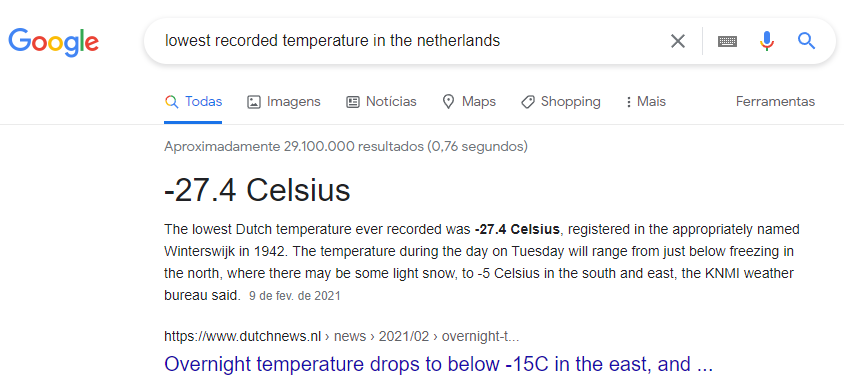

In [206]:
negtemp = weather[weather['tg'] < 0]['tg'].tolist()
negtemp.sort()

In [207]:
occurrences = collections.Counter(negtemp)
negtemps = pd.DataFrame(occurrences, index = ['temp', 'count'])
negtemps.T

,temp,count
-66,1,1
-50,1,1
-49,2,2
-46,1,1
-45,1,1
-38,1,1
-35,2,2
-34,1,1
-33,1,1
-29,3,3


- Looking to the date above we can check that we have some extreme values but other are acceptable, so let's change the filter

In [208]:
negtemp = weather[weather['tg'] < -28]['tg'].tolist()
negtemp.sort()

In [209]:
occurrences = collections.Counter(negtemp)
negtemp = pd.DataFrame(occurrences, index = ['temp', 'count'])
negtemps = negtemp.T
negtemps

,temp,count
-66,1,1
-50,1,1
-49,2,2
-46,1,1
-45,1,1
-38,1,1
-35,2,2
-34,1,1
-33,1,1
-29,3,3


In [210]:
negtemps['count'].sum()

14

In [212]:
weather[weather['tg'] < -28].T

,23398,23758,24123,24124,24529,24530,24531,24532,25605,25606,25608,25609,25610,25611
yyyymmdd,20150123.0,20160118.0,20170117.0,20170118.0,20180227.0,20180228.0,20180301.0,20180302.0,20210207.0,20210208.0,20210210.0,20210211.0,20210212.0,20210213.0
ddvec,175.0,139.0,128.0,127.0,66.0,79.0,78.0,77.0,63.0,70.0,52.0,89.0,78.0,106.0
fhvec,27.0,31.0,17.0,12.0,42.0,79.0,112.0,94.0,120.0,81.0,37.0,14.0,60.0,52.0
fg,33.0,31.0,18.0,14.0,44.0,80.0,112.0,95.0,121.0,81.0,40.0,19.0,60.0,53.0
fhx,80.0,50.0,30.0,20.0,60.0,100.0,120.0,120.0,140.0,110.0,60.0,40.0,80.0,70.0
fhxh,24.0,9.0,6.0,1.0,4.0,16.0,5.0,4.0,6.0,4.0,1.0,20.0,13.0,23.0
fhn,10.0,20.0,0.0,0.0,30.0,50.0,100.0,60.0,100.0,40.0,10.0,0.0,30.0,40.0
fhnh,1.0,5.0,16.0,21.0,7.0,1.0,1.0,23.0,23.0,21.0,24.0,7.0,1.0,5.0
fxx,130.0,70.0,50.0,40.0,90.0,160.0,190.0,180.0,220.0,170.0,100.0,60.0,130.0,100.0
fxxh,24.0,9.0,6.0,7.0,1.0,18.0,9.0,1.0,9.0,2.0,1.0,14.0,12.0,2.0


- The columns with temperatures < -28°C also present the other weird values. As the amount of row in this situation in very small, let's first merge the datasets before excluding information

In [214]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 2664 to 2280
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   newdate  2666 non-null   object
 1   pm25     2666 non-null   object
 2   pm10     2666 non-null   object
 3   o3       2666 non-null   object
 4   no2      2666 non-null   object
 5   so2      2666 non-null   object
 6   co       2666 non-null   object
dtypes: object(7)
memory usage: 166.6+ KB


In [215]:
pm25 = len(air_quality[air_quality['pm25']==' '])
pm10 = len(air_quality[air_quality['pm10']==' '])
o3 = len(air_quality[air_quality['o3']==' '])
no2 = len(air_quality[air_quality['no2']==' '])
print(pm25, pm10, o3, no2)

401 9 46 12


In [216]:
pm25 = len(air_quality[air_quality['pm25']==0])
pm10 = len(air_quality[air_quality['pm10']==0])
o3 = len(air_quality[air_quality['o3']==0])
no2 = len(air_quality[air_quality['no2']==0])
print(pm25, pm10, o3, no2)

0 0 0 0


- Replacing spaces (' ') for empty ('')

In [219]:
for x in air_quality.columns:
    a = air_quality[x].dtypes == 'object'
    if a == True:
        air_quality[x] = [x.strip(' ') for x in air_quality[x]]
    else:
        pass

- As now all the information in the data frame looks like numeric let's convert all columns to numeric

In [222]:
for x in air_quality.columns:
    air_quality[x] =  pd.to_numeric(air_quality[x], errors='coerce')

In [223]:
air_quality.dtypes

newdate      int64
pm25       float64
pm10       float64
o3         float64
no2        float64
so2        float64
co         float64
dtype: object

- Checking NaN values

In [224]:
gas = air_quality.columns.tolist()
NaN = air_quality.isna().sum()
NaNperc = air_quality.isna().sum()/air_quality.shape[0]
aqNaN = pd.DataFrame(list(zip(gas, NaN, NaNperc)),
               columns =['gas', 'NaN', 'NaN%'])
aqNaN['NaN%'] = aqNaN['NaN%'].map('{:.2%}'.format)
aqNaN

,gas,NaN,NaN%
0,newdate,0,0.00%
1,pm25,401,15.04%
2,pm10,9,0.34%
3,o3,46,1.73%
4,no2,12,0.45%
5,so2,1979,74.23%
6,co,465,17.44%


- Based on the NaN table we can see that we don't have much information about so2, so let's drop the column

In [235]:
air_quality = air_quality.drop(['so2'], axis=1)

In [237]:
air_quality[:30]

,newdate,pm25,pm10,o3,no2,co
2664,20131231,NaN,NaN,NaN,30.0,NaN
2579,20140101,NaN,42.0,NaN,32.0,NaN
2580,20140102,NaN,14.0,NaN,28.0,NaN
2581,20140103,NaN,17.0,NaN,26.0,NaN
2582,20140104,NaN,19.0,NaN,28.0,NaN
2583,20140105,NaN,16.0,NaN,23.0,NaN
2584,20140106,NaN,11.0,NaN,21.0,NaN
2585,20140107,NaN,19.0,NaN,29.0,NaN
2586,20140108,NaN,20.0,NaN,24.0,NaN
2587,20140109,NaN,22.0,NaN,32.0,NaN


In [238]:
air_quality[2630:]

,newdate,pm25,pm10,o3,no2,co
2292,20211012,NaN,19.0,26.0,24.0,2.0
2293,20211013,NaN,20.0,24.0,17.0,2.0
2294,20211014,NaN,16.0,26.0,18.0,2.0
2295,20211015,NaN,23.0,20.0,28.0,4.0
2296,20211016,NaN,28.0,17.0,23.0,3.0
2297,20211017,NaN,25.0,11.0,22.0,3.0
2298,20211018,NaN,28.0,14.0,16.0,3.0
2299,20211019,NaN,24.0,26.0,12.0,2.0
2300,20211020,NaN,23.0,28.0,10.0,2.0
2301,20211021,NaN,20.0,28.0,11.0,2.0


- Having a look on the top 30 and last 30 rows from the air_quality dataset we can see that we don't have complete information about pm25 and co, mainly on the first years

- Filling NaNs with the mode

In [240]:
#for x in air_quality.columns:
#    a = air_quality[x].mode()
#    air_quality[x] = air_quality[x].fillna(a)

- This code doesn't works, using a different way

In [244]:
air_quality = air_quality.replace(np.nan, 0)

In [245]:
gas = air_quality.columns.tolist()
NaN = air_quality.isna().sum()
NaNperc = air_quality.isna().sum()/air_quality.shape[0]
aqNaN = pd.DataFrame(list(zip(gas, NaN, NaNperc)),
               columns =['gas', 'NaN', 'NaN%'])
aqNaN['NaN%'] = aqNaN['NaN%'].map('{:.2%}'.format)
aqNaN

,gas,NaN,NaN%
0,newdate,0,0.00%
1,pm25,0,0.00%
2,pm10,0,0.00%
3,o3,0,0.00%
4,no2,0,0.00%
5,co,0,0.00%


- Let's calculate the quality of the air based on the information we have

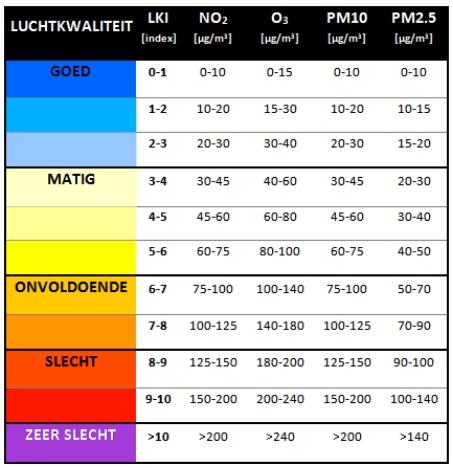

In [246]:
no2lki = []
LKI = 0

for no2 in air_quality['no2']:
    
    if no2 == ' ':
        LKI = 0
    elif int(no2) < 10:
        LKI = 1
    elif int(no2) >= 10 & int(no2) < 20:
        LKI = 2
    elif int(no2) >= 20 & int(no2) < 30:
        LKI = 3        
    elif int(no2) >= 30 & int(no2) < 45:
        LKI = 4
    elif int(no2) >= 45 & int(no2) < 60:
        LKI = 5
    elif int(no2) >= 60 & int(no2) < 75:
        LKI = 6
    elif int(no2) >= 75 & int(no2) < 100:
        LKI = 7
    elif int(no2) >= 100 & int(no2) < 125:
        LKI = 8
    elif int(no2) >= 125 & int(no2) < 150:
        LKI = 9
    elif int(no2) >= 150 & int(no2) < 200:
        LKI = 10
    else: #elif int(no2) >= 200:
        LKI = 11
    
    no2lki.append(LKI)
    
air_quality['no2lki'] = no2lki

In [248]:
air_quality['no2lki'].value_counts() # Imbalanced data

2    2569
1      97
Name: no2lki, dtype: int64

In [249]:
o3lki = []
LKI = 0

for o3 in air_quality['o3']:
    
    if o3 == ' ':
        LKI = 0
    elif int(o3) < 15:
        LKI = 1
    elif int(o3) >= 15 & int(o3) < 30:
        LKI = 2
    elif int(o3) >= 30 & int(o3) < 40:
        LKI = 3        
    elif int(o3) >= 40 & int(o3) < 60:
        LKI = 4
    elif int(o3) >= 60 & int(o3) < 80:
        LKI = 5
    elif int(o3) >= 80 & int(o3) < 100:
        LKI = 6
    elif int(o3) >= 100 & int(o3) < 140:
        LKI = 7
    elif int(o3) >= 140 & int(o3) < 180:
        LKI = 8
    elif int(o3) >= 180 & int(o3) < 200:
        LKI = 9
    elif int(o3) >= 200 & int(o3) < 240:
        LKI = 10
    else: #elif int(o3) >= 240:
        LKI = 11
        
    o3lki.append(LKI)
    
air_quality['o3lki'] = o3lki

In [250]:
air_quality['o3lki'].value_counts()

2    2271
1     395
Name: o3lki, dtype: int64

In [251]:
pm10lki = []
LKI = 0

for pm10 in air_quality['pm10']:
    
    if pm10 == ' ':
        LKI = 0
    elif int(pm10) < 10:
        LKI = 1
    elif int(pm10) >= 10 & int(pm10) < 20:
        LKI = 2
    elif int(pm10) >= 20 & int(pm10) < 30:
        LKI = 3        
    elif int(pm10) >= 30 & int(pm10) < 45:
        LKI = 4
    elif int(pm10) >= 45 & int(pm10) < 60:
        LKI = 5
    elif int(pm10) >= 60 & int(pm10) < 75:
        LKI = 6
    elif int(pm10) >= 75 & int(pm10) < 100:
        LKI = 7
    elif int(pm10) >= 100 & int(pm10) < 125:
        LKI = 8
    elif int(pm10) >= 125 & int(pm10) < 150:
        LKI = 9
    elif int(pm10) >= 150 & int(pm10) < 200:
        LKI = 10
    else: #elif int(pm10) >= 200:
        LKI = 11
        
    pm10lki.append(LKI)
    
air_quality['pm10lki'] = pm10lki

In [252]:
air_quality['pm10lki'].value_counts()

2    2649
1      17
Name: pm10lki, dtype: int64

In [254]:
pm25lki = []
LKI = 0

for pm25 in air_quality['pm25']:
    
    if pm25 == ' ':
        LKI = 0
    elif int(pm25) < 10:
        LKI = 1
    elif int(pm25) >= 10 & int(pm25) < 15:
        LKI = 2
    elif int(pm25) >= 15 & int(pm25) < 20:
        LKI = 3        
    elif int(pm25) >= 20 & int(pm25) < 30:
        LKI = 4
    elif int(pm25) >= 30 & int(pm25) < 40:
        LKI = 5
    elif int(pm25) >= 40 & int(pm25) < 50:
        LKI = 6
    elif int(pm25) >= 50 & int(pm25) < 70:
        LKI = 7
    elif int(pm25) >= 70 & int(pm25) < 90:
        LKI = 8
    elif int(pm25) >= 90 & int(pm25) < 100:
        LKI = 9
    elif int(pm25) >= 100 & int(pm25) < 140:
        LKI = 10
    else: #elif int(pm25) >= 140:
        LKI = 11
        
        pm25lki.append(LKI)
    
air_quality['pm25lki'] = pm25lki

ValueError: Length of values (0) does not match length of index (2666)

In [258]:
air_quality['pm25lki'].value_counts()

KeyError: 'pm25lki'

In [255]:
air_quality['pm25'].unique()

array([  0.,  54.,  56.,  46.,  48.,  70.,  85.,  69.,  92.,  82.,  62.,
        32.,  40.,  75., 102.,  80.,  43.,  41.,  61.,  65.,  71.,  83.,
        77.,  73.,  78.,  53.,  97., 119.,  94., 111., 107., 113., 125.,
        44.,  49.,  28.,  21.,  35.,  64.,  51.,  33.,  38.,  47.,  25.,
        36., 156.,  37.,  66.,  50.,  39.,  20.,  30.,  58.,  99., 101.,
       117.,  45.,  29.,  31.,  81.,  59.,  67., 114., 136., 100.,  96.,
       158., 149.,  91.,  90.,  68.,  55.,  42.,  26.,  57.,  76., 138.,
       153., 150., 123.,  60.,  23.,  27., 106.,  63.,  79.,  72.,  34.,
        52.,  87., 121., 145.,  98.,  74., 105.,  89.,  84., 116., 131.,
       124.,  88., 120., 161.,  86., 115., 137., 103., 104.,  93., 110.,
       160., 141., 126., 155.,  95., 151., 129., 128., 152., 164., 154.,
       143., 118., 127., 108., 112., 132., 139., 122.,  19.,  11., 165.,
        16.,  22.,  18., 172., 109.])

In [256]:
air_quality['pm25'].value_counts()

0.0      401
50.0      67
45.0      57
48.0      57
51.0      56
        ... 
158.0      1
132.0      1
11.0       1
107.0      1
129.0      1
Name: pm25, Length: 137, dtype: int64

In [259]:
for no2, o3, pm10 in zip(air_quality['no2lki'], air_quality['o3lki'], air_quality['pm10lki']):
    
    print(no2, o3, pm10)

2 1 1
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
1 1 2
2 1 1
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
2 1 2
1 1 2
1 1 1
2 1 2
2 2 2
2 2 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 1 2
2 1 2
2 1 2
2 2 2
2 2 2
2 1 2
2 1 2
2 2 2
2 2 2
2 1 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
1 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 

2 1 2
2 1 2
2 1 2
2 2 2
2 2 2
1 1 1
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
1 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 1 2
2 1 2
2 1 2
2 2 2
2 1 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 2 2
2 1 2
2 1 2
2 2 2
2 1 2
2 1 2
2 1 2
2 2 2
2 2 2
1 2 2
2 2 1
2 2 2
2 2 2
2 2 2
2 1 2
2 1 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 1 2
2 1 2
2 1 2
2 2 2
2 1 2
2 1 2
2 1 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
1 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
1 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
1 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
2 2 2
1 2 2
2 2 2
2 2 

In [260]:
totallki = []
LKI = 0

for no2, o3, pm10 in zip(air_quality['no2lki'], air_quality['o3lki'], air_quality['pm10lki']):
    
    m = max(int(no2), int(o3), int(pm10))
    
    if m < 4:
        LKI = 'good'
    elif m >= 4 & m < 7:
        LKI = 'mediocre'
    elif m >= 7 & m < 9:
        LKI = 'inadequate'      
    elif m >= 9 & m < 11:
        LKI = 'bad'
    else: #elif m >= 11:
        LKI = 'very bad'
        
        totallki.append(LKI)
    
air_quality['totallki'] = totallki

ValueError: Length of values (0) does not match length of index (2666)

In [261]:
air_quality.head()

,newdate,pm25,pm10,o3,no2,co,no2lki,o3lki,pm10lki
2664,20131231,0.0,0.0,0.0,30.0,0.0,2,1,1
2579,20140101,0.0,42.0,0.0,32.0,0.0,2,1,2
2580,20140102,0.0,14.0,0.0,28.0,0.0,2,1,2
2581,20140103,0.0,17.0,0.0,26.0,0.0,2,1,2
2582,20140104,0.0,19.0,0.0,28.0,0.0,2,1,2


In [262]:
air_quality.tail()

,newdate,pm25,pm10,o3,no2,co,no2lki,o3lki,pm10lki
2276,20211112,0.0,40.0,15.0,20.0,3.0,2,2,2
2277,20211113,0.0,22.0,9.0,12.0,3.0,2,1,2
2278,20211114,0.0,22.0,15.0,13.0,3.0,2,2,2
2279,20211115,0.0,25.0,13.0,16.0,3.0,2,1,2
2280,20211116,0.0,40.0,0.0,0.0,0.0,1,1,2


- Checking if we have all days in a sequence

In [265]:
# Calculating the days within the dataset interval based on the head() and tail()
d0 = date(2013, 12, 31)
d1 = date(2021, 11, 16)
delta = (d1 - d0).days

# Calculating the amount of lines in the dataset
delta2 = len(air_quality['newdate'])-1

# Doing the check
if (int(delta) - delta2) == 0:
    print('Ok number of rows!')
else:
    print('You have a difference of rows, please check missing information.', int(delta) - delta2, 'missing values')

You have a difference of rows, please check missing information. 212 missing values


- Merging the tables

In [266]:
weather = weather.set_index('yyyymmdd')
air_quality = air_quality.set_index('newdate')

In [270]:
data = pd.concat([weather, air_quality], axis=1)
data

,ddvec,fhvec,fg,fhx,fhxh,fhn,fhnh,fxx,fxxh,tg,...,rain,rainy,pm25,pm10,o3,no2,co,no2lki,o3lki,pm10lki
20131231,167,72,73,90,10,50,5,130,11,66,...,1,1,0.0,0.0,0.0,30.0,0.0,2.0,1.0,1.0
20140101,168,78,80,110,21,60,2,170,21,68,...,1,1,0.0,42.0,0.0,32.0,0.0,2.0,1.0,2.0
20140102,191,62,70,100,1,50,16,140,1,83,...,1,1,0.0,14.0,0.0,28.0,0.0,2.0,1.0,2.0
20140103,199,91,97,130,23,70,1,230,19,85,...,1,1,0.0,17.0,0.0,26.0,0.0,2.0,1.0,2.0
20140104,169,64,69,110,1,40,23,150,1,76,...,1,1,0.0,19.0,0.0,28.0,0.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211113,265,9,25,70,1,10,20,110,1,113,...,1,1,0.0,22.0,9.0,12.0,3.0,2.0,1.0,2.0
20211114,64,32,33,50,10,10,1,80,9,99,...,1,1,0.0,22.0,15.0,13.0,3.0,2.0,2.0,2.0
20211115,63,31,33,40,10,20,23,80,12,67,...,0,1,0.0,25.0,13.0,16.0,3.0,2.0,1.0,2.0
20211116,173,20,24,50,23,10,3,80,24,52,...,1,0,0.0,40.0,0.0,0.0,0.0,1.0,1.0,2.0


In [271]:
data.isna().sum()

ddvec        0
fhvec        0
fg           0
fhx          0
fhxh         0
fhn          0
fhnh         0
fxx          0
fxxh         0
tg           0
tn           0
tnh          0
tx           0
txh          0
t10n         0
t10nh        0
sq           0
sp           0
q            0
dr           0
rh           0
rhx          0
rhxh         0
pg           0
px           0
pxh          0
pn           0
pnh          0
vvn          0
vvnh         0
vvx          0
vvxh         0
ng           0
ug           0
ux           0
uxh          0
un           0
unh          0
ev24         0
rain         0
rainy        0
pm25       213
pm10       213
o3         213
no2        213
co         213
no2lki     213
o3lki      213
pm10lki    213
dtype: int64

- Here we can see the date missing values from the air_quality dataset

In [272]:
data = data.replace(np.nan, 0)

- Exporting this processed data to a csv

In [641]:
weather.to_csv('cleanweather.csv')
air_quality.to_csv('cleanairquality.csv')

## EDA

In [249]:
corr_weather = weather.select_dtypes([np.number])
correlations_matrix = corr_weather.corr()
correlations_matrix

,yyyymmdd,ddvec,fhvec,fg,fhx,fhxh,fhn,fhnh,tg,tn,tx,rh,pg
yyyymmdd,1.000000,0.002475,-0.010293,-0.018317,-0.020898,0.001572,-0.025832,-0.011733,0.014103,0.000565,0.021398,-0.005018,0.009701
ddvec,0.002475,1.000000,0.107347,0.154639,0.236396,-0.007863,0.033076,0.089154,0.034090,0.080032,-0.000052,0.108147,-0.063849
fhvec,-0.010293,0.107347,1.000000,0.966034,0.868352,-0.036929,0.847025,0.130587,-0.151493,-0.031101,-0.237782,0.189099,-0.313703
fg,-0.018317,0.154639,0.966034,1.000000,0.926965,-0.031885,0.854503,0.153511,-0.129420,-0.005929,-0.214185,0.271145,-0.395916
fhx,-0.020898,0.236396,0.868352,0.926965,1.000000,0.070043,0.688792,0.138385,-0.094655,0.004658,-0.161827,0.315891,-0.420082
fhxh,0.001572,-0.007863,-0.036929,-0.031885,0.070043,1.000000,-0.052162,-0.386133,0.106027,0.053811,0.134040,-0.020780,0.046849
fhn,-0.025832,0.033076,0.847025,0.854503,0.688792,-0.052162,1.000000,0.017082,-0.160124,-0.023231,-0.244434,0.169178,-0.320704
fhnh,-0.011733,0.089154,0.130587,0.153511,0.138385,-0.386133,0.017082,1.000000,-0.046493,0.002433,-0.071188,0.079072,-0.094515
tg,0.014103,0.034090,-0.151493,-0.129420,-0.094655,0.106027,-0.160124,-0.046493,1.000000,0.952017,0.976920,0.022297,0.001009
tn,0.000565,0.080032,-0.031101,-0.005929,0.004658,0.053811,-0.023231,0.002433,0.952017,1.000000,0.881920,0.100483,-0.088832


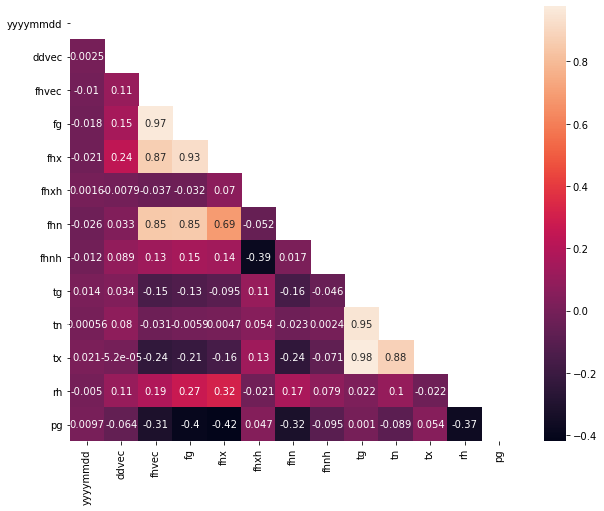

In [250]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [ ]:
data_corr[(data_corr['IC1'] > 0.8) | (data_corr['IC1'] < -0.8)][['IC1', 'TARGET_D']] # filtering for some analysis

The chi-square independence test is a procedure for testing if two categorical variables are related in some population. (unit 1 3-EDA)